某工厂的某种产品成箱包装，每箱200件，每一箱产品在交付用户之前要对产品作检验，如检验出不合格品，则更换为合格品，检验时，先从这箱产品中任取20件产品作检验，再根据检验结果决定是否对余下的所有产品做检验，设每件产品为不合格品的概率都为$P$，且各件产品是否为不合格品相互独立。

（1）记20件产品中恰有2件不合格品的概率为$f(P)$，求$f(P)$的最大值点。

解答：

$P_m=\mathop{\arg\max}_Pf(P)=\mathop{\arg\max}_PC_{20}^2P^2(1-P)^{18}$

$\frac{df(P)}{dP}=2C_{20}^2P(1-P)^{17}(1-10P)$

In [5]:
from scipy.special import comb
from scipy.optimize import minimize
def f(p):
    return -comb(20,2)*(p**2)*(1-p)**18
p0=0.5
res=minimize(f,x0=[p0],method='BFGS')
pm=res.x
print(pm)

[0.09999999]


In [26]:
from scipy.special import comb
from scipy.optimize import minimize
def f(p):
    return -comb(20,2)*(p**2)*(1-p)**18
def df(p):
    return -2*comb(20,2)*p*((1-p)**17)*(1-10*p)
p0=0.5
res=minimize(f,x0=[p0],method='BFGS',jac=df)
pm=res.x
print(pm)

[0.1]


In [32]:
from sympy import Symbol,binomial
from sympy import diff
from numpy import array
p=Symbol("p")
f=-binomial(20,2)*(p**2)*(1-p)**18
df=diff(f,p)
print("f(p)=",f)
print("df(p)/dp=",df)

f(p)= -190*p**2*(-p + 1)**18
df(p)/dp= 3420*p**2*(-p + 1)**17 - 380*p*(-p + 1)**18


In [33]:
from scipy.special import comb
from scipy.optimize import minimize
def f(p):
    return -190*p**2*(-p + 1)**18
def df(p):
    return 3420*p**2*(-p + 1)**17 - 380*p*(-p + 1)**18
p0=0.5
res=minimize(f,x0=[p0],method='BFGS',jac=df)
pm=res.x
print(pm)

[0.1]


水仙花数是指一个 3 位数，它的每个位上的数字的3次幂之和等于它本身，即：

$abc=a^3+b^3+c^3$

问题：计算出所有的水仙花数

$a=abc/100$

$b=(abc/10)\%10$ 

$c=abc\%10$

%表示求余数，/是整除

$f(abc)=\left\{ \begin{align}
1& &a^3+b^3+c^3==abc\\
0& &a^3+b^3+c^3\ne abc
\end{align}\right.$

从100到999计算如下：
$f(100)=0$

$f(101)=0$

...

$f(999)=0$

In [36]:
def f(abc):
    a=abc//100
    b=(abc//10)%10
    c=abc%10
    if a**3+b**3+c**3==abc:
        return 1
    else:
        return 0
for abc in range(100,1000):
    if f(abc)==1:
        print(abc,"是水仙花数")

153 是水仙花数
370 是水仙花数
371 是水仙花数
407 是水仙花数


某机床厂生产甲、乙两种机床，每台销售后的利润分别为4000元与3000元.生产甲机床需用A、 B机器加工，加工时间分别为 每台2h和1h；生产乙机床需用A、B、C三种机器加工，加工时间为每台各1h.若每天可用于加工的机器时数分别为A机器10h、B机器8h和C机器7h，问该厂每天应生产甲、乙机床各几台，才能使总利润最大？

解：

$$\max f=4000x_1+3000x_2\\
 s.t.\left\{
\begin{aligned}
2x_1+x_2\le10 \\
x_1+x_2\le8 \\
x_2\le7\\
x_1\ge0\\
x_2\ge0
\end{aligned}
\right.
$$

故此需要对原始问题进行转换：
$$\min f=-4000x_1-3000x_2=\begin{bmatrix}-4000&-3000\end{bmatrix}\begin{bmatrix}x_1\\x_2\end{bmatrix}\\
C=\begin{bmatrix}-4000\\-3000\end{bmatrix}\\
 s.t.\left\{
\begin{aligned}
2x_1+x_2\le10 \\
x_1+x_2\le8 \\
x_2\le7\\
-x_1\le0\\
-x_2\le0
\end{aligned}=>s.t.\begin{bmatrix}2&1\\1&1\\0&1\\-1&0\\0&-1\end{bmatrix}\begin{bmatrix}x_1\\x_2\end{bmatrix}\le\begin{bmatrix}10\\8\\7\\0\\0\end{bmatrix}
\right.\\
A\_ub=\begin{bmatrix}2&1\\1&1\\0&1\\-1&0\\0&-1\end{bmatrix}\\
b\_ub=\begin{bmatrix}10\\8\\7\\0\\0\end{bmatrix}
$$

In [38]:
import numpy as np
from scipy.optimize import linprog
c=np.array([-4000,-3000])
A_ub=np.array([[2,1],[1,1],[0,1],[-1,0],[0,-1]])
b_ub=np.array([10,8,7,0,0])
res=linprog(c,A_ub=A_ub,b_ub=b_ub)
print("x1=",res.x[0],"x2=",res.x[1],"max f=",-res.fun)

x1= 2.0 x2= 6.0 max f= 26000.0


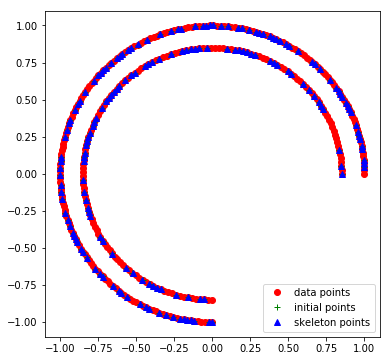

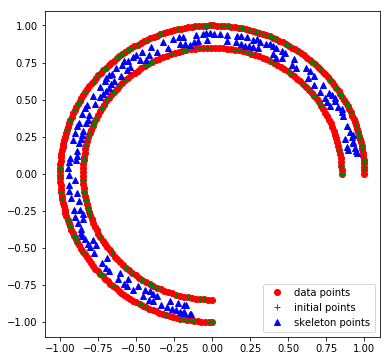

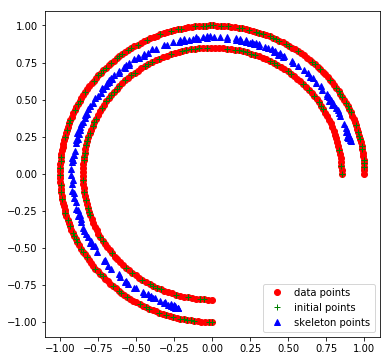

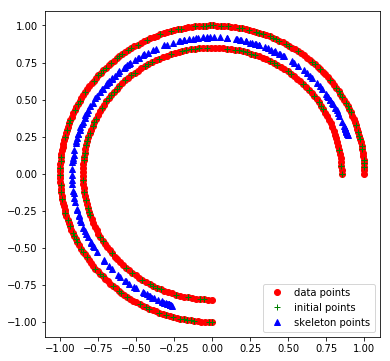

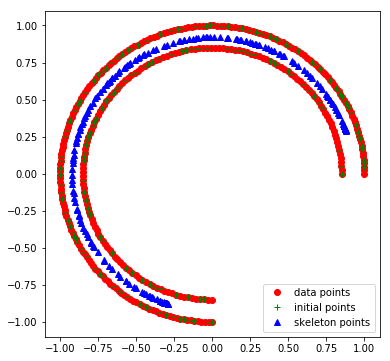

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#生成测试数据
seta1=np.linspace(0,1.5*np.pi,150)
seta2=np.linspace(0,1.5*np.pi,200)
q=np.hstack((np.vstack((0.85*np.cos(seta1),0.85*np.sin(seta1))),np.vstack((np.cos(seta2),np.sin(seta2)))))
q=q.T #q是n行2列的数据，每行对应一个点
e=1e-8 #极小值
#从q选点
indices=np.arange(0,q.shape[0])
np.random.shuffle(indices)
ratio=0.5 #控制选点的比例
x=q[indices[:int(q.shape[0]*ratio)]] #按比例选点
x0=x.copy()
maxiter=20 #迭代次数
k=0.02 #对应论文R(X)中的γ常量，k越大骨架点间的距离越大，S曲线建议取0.02

def gauss1(r): #数据项使用的高斯函数
    sigma=0.25 #请根据骨架点到数据点的距离调整，S曲线建议取0.25
    return np.exp(-(r/sigma)**2)
def gauss2(r): #正则项使用的高斯函数
    sigma=0.1*1 #请根据骨架点间的间距进行调整，S曲线建议取0.1
    return np.exp(-(r/sigma)**2)

#迭代maxiter次
for iter in range(maxiter):
    x1=np.zeros(x0.shape)
    for i in range(x0.shape[0]):
        sum_of_dataTerm_weights=0
        dataTerm=0
        regularizationTerm=0
        for j in range(q.shape[0]):
            diff=x0[i]-q[j]
            r=np.linalg.norm(diff)
            weight=gauss1(r)/(r+e)
            sum_of_dataTerm_weights+=weight
            dataTerm+=q[j]*weight
        dataTerm/=sum_of_dataTerm_weights #归一化
        sum_of_regularizationTerm_weights=0
        covariance_matrix=0
        for j in range(x0.shape[0]):
            if i!=j:
                diff=x0[i]-x0[j]
                r=np.linalg.norm(diff)
                weight=gauss2(r)/(r**2+e)
                sum_of_regularizationTerm_weights+=weight
                regularizationTerm+=diff*weight
                covariance_matrix+=weight*np.dot(diff.reshape(2,1),diff.reshape(1,2))
        regularizationTerm/=sum_of_regularizationTerm_weights #归一化
        #以下三行对应论文公式（2），求σ
        vals=np.linalg.eigvals(covariance_matrix) 
        vals=np.sort(vals)
        s=vals[1]/(vals[0]+vals[1])
        #x1[i]=dataTerm+k*sum_of_regularizationTerm_weights/sum_of_dataTerm_weights/s*regularizationTerm #对应公式（4）
        x1[i]=dataTerm+k/s*regularizationTerm #对应公式（4）
    x0=x1.copy()
    #每10次迭代绘图
    if iter % 5 ==0:
        plt.figure(figsize=(6,6))
        plt.plot(q[:,0],q[:,1],'ro',label='data points')
        plt.plot(x[:,0],x[:,1],'g+',label='initial points')
        plt.plot(x1[:,0],x1[:,1],'b^',label='skeleton points')
        #plt.axis('scaled')
        plt.legend()
plt.figure(figsize=(6,6))
plt.plot(q[:,0],q[:,1],'ro',label='data points')
plt.plot(x[:,0],x[:,1],'g+',label='initial points')
plt.plot(x1[:,0],x1[:,1],'b^',label='skeleton points')
#plt.axis('scaled')
plt.legend()